In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [263]:
dt = pd.read_csv('./results/low_density/filter_data_low_density_final.csv', sep = ';')
dt.head() 

/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,COMMUNE,MEN_REL,WOMEN_REL,ILTUU_1_REL,ILTUU_2_REL,ILTUU_3_REL,ILTUU_4_REL,ILTUU_5_REL,ILTUU_Z_REL,...,VOIT_Z_REL,NA5_AZ_REL,NA5_BE_REL,NA5_FZ_REL,NA5_GU_REL,NA5_OQ_REL,NA5_ZZ_REL,POIDS_VILLE,NB_HABITANTS,INDICE_DENSITE
0,0,1001,201.493986,170.730808,75.923416,296.301378,0.0,0.0,0.0,0,...,0.0,20.237939,55.318190,20.057390,151.028214,125.583061,0,372.224794,771.0,3.0
1,1,1002,52.057613,57.263374,10.411523,98.909465,0.0,0.0,0.0,0,...,0.0,0.000000,10.411523,15.617284,46.851852,36.440329,0,109.320988,253.0,4.0
2,3,1005,434.343434,419.865320,149.607183,704.601571,0.0,0.0,0.0,0,...,0.0,19.304153,106.172840,120.650954,381.257015,226.823793,0,854.208754,1720.0,3.0
3,4,1006,25.454545,30.545455,0.000000,56.000000,0.0,0.0,0.0,0,...,0.0,0.000000,10.181818,10.181818,20.363636,15.272727,0,56.000000,112.0,4.0
4,5,1007,651.247312,641.379928,177.612903,1115.014337,0.0,0.0,0.0,0,...,0.0,14.801075,222.016129,113.474910,557.507168,384.827957,0,1292.627240,2763.0,3.0


In [264]:
ids = dt["COMMUNE"]
cols = ['ILTUU_1_REL', 'ILTUU_2_REL', 'ILTUU_3_REL', 'ILTUU_4_REL', 'ILTUU_5_REL', 'ILTUU_Z_REL', 
        'TRANS_1_REL', 'TRANS_2_REL', 'TRANS_3_REL', 'TRANS_4_REL', 'TRANS_5_REL', 'TRANS_6_REL', 'TRANS_Z_REL',
        'VOIT_0_REL', 'VOIT_1_REL', 'VOIT_2_REL', 'VOIT_3_REL', 'VOIT_X_REL', 'VOIT_Z_REL', 
        'NA5_AZ_REL', 'NA5_BE_REL', 'NA5_FZ_REL', 'NA5_GU_REL', 'NA5_OQ_REL', 'NA5_ZZ_REL'
       ]

for c in cols:
    dt[c]=dt[c]/dt['POIDS_VILLE'] 

In [289]:
def boxplots_gen(fig_name, col_names, showfliers=True, grouped_by=False):
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    meanpointprops = dict(marker='X', markersize=8, markeredgecolor='black', markerfacecolor='firebrick')
    whiskerprops = dict(linestyle='-.',linewidth=2, color='k')
    capprops = dict(linewidth=2,color='k')
    
    fig = plt.figure(figsize=(12,8))
    ax = dt.boxplot(column=col_names, 
                    boxprops=boxprops,
                    medianprops=medianprops,
                    meanprops=meanpointprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    showfliers=showfliers, 
                    showmeans=True)
    
    ax.set_xlabel(fig_name, size=13)
    ax.set_title("Distribution des %s dans les communes \n de densité de type 3 et 4"%fig_name, size=18)
    ax.set_ylim(-0.05,1.05)
    
    fig.savefig("./results/figures/3et4/%s.jpg"%str((fig_name,showfliers)))

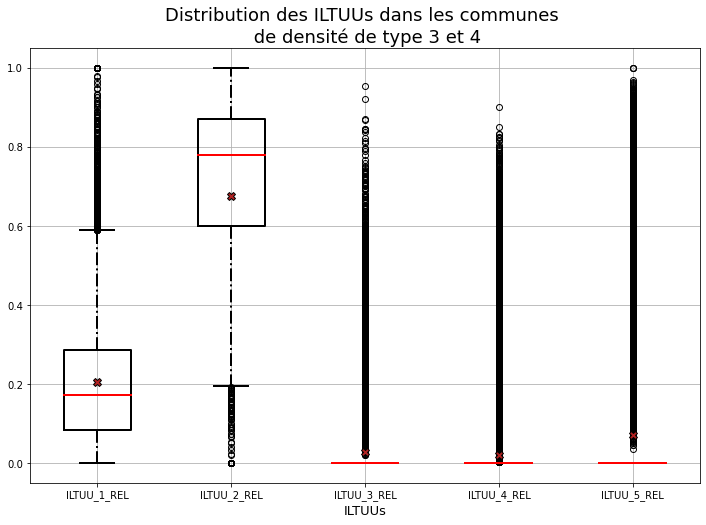

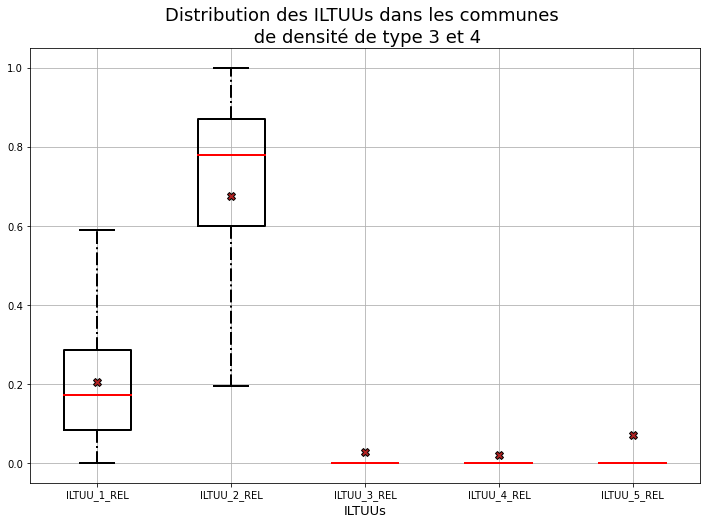

In [290]:
iltuu_cols = ["ILTUU_1_REL", "ILTUU_2_REL", "ILTUU_3_REL", "ILTUU_4_REL", "ILTUU_5_REL"]
boxplots_gen("ILTUUs", iltuu_cols, showfliers=True)
boxplots_gen("ILTUUs", iltuu_cols, showfliers=False)

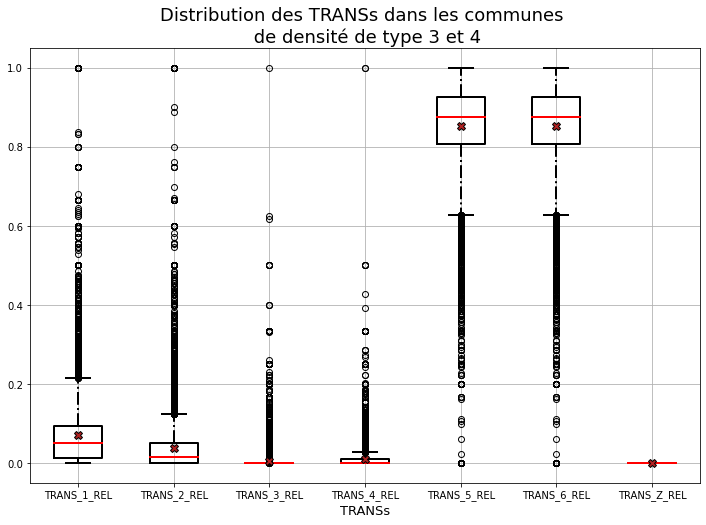

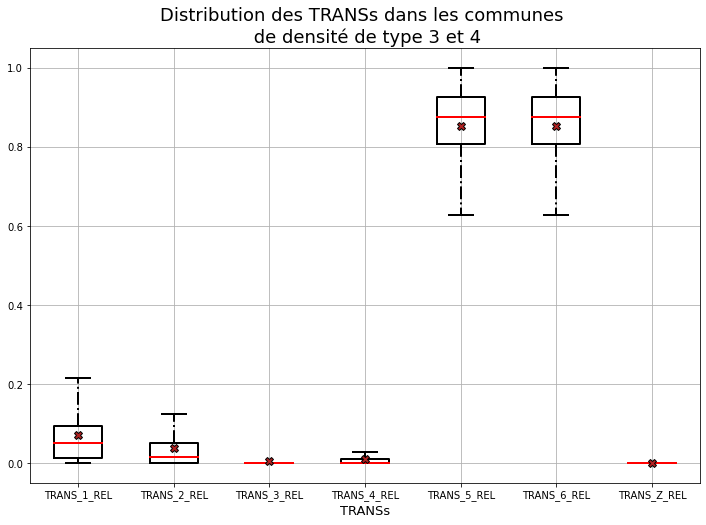

In [291]:
trans_cols = ["TRANS_1_REL", "TRANS_2_REL", "TRANS_3_REL", "TRANS_4_REL", "TRANS_5_REL", "TRANS_6_REL", "TRANS_Z_REL"]
boxplots_gen("TRANSs", trans_cols, showfliers=True)
boxplots_gen("TRANSs", trans_cols, showfliers=False)

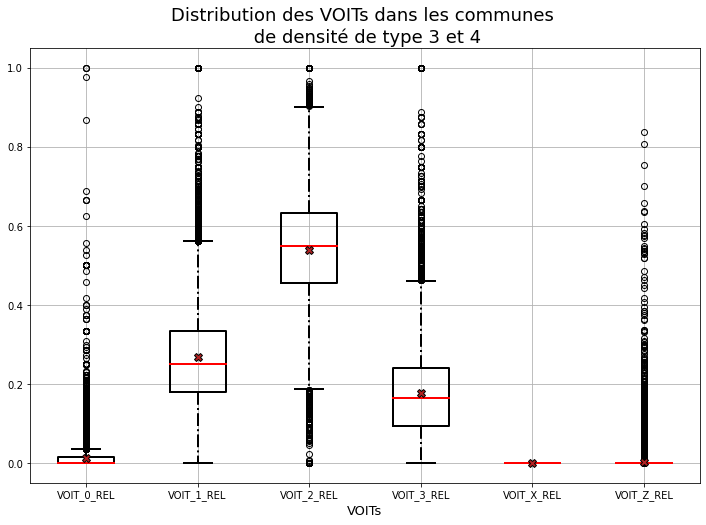

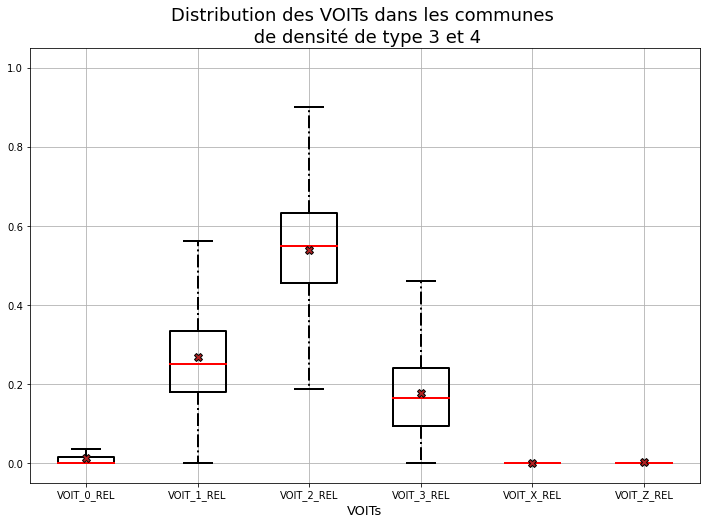

In [292]:
voit_cols = ["VOIT_0_REL", "VOIT_1_REL", "VOIT_2_REL", "VOIT_3_REL", "VOIT_X_REL", "VOIT_Z_REL"]
boxplots_gen("VOITs", voit_cols, showfliers=True)
boxplots_gen("VOITs", voit_cols, showfliers=False)

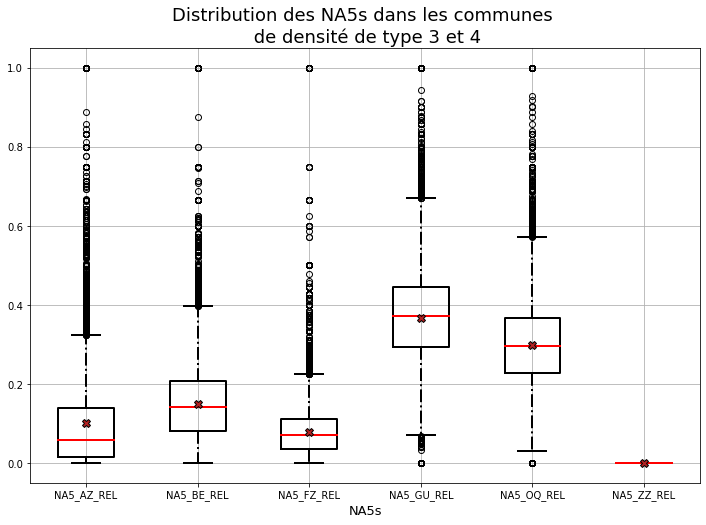

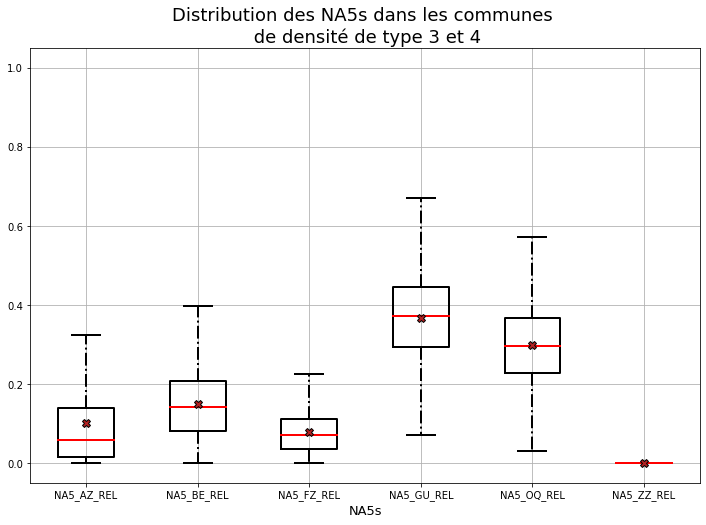

In [293]:
na5_cols = ["NA5_AZ_REL", "NA5_BE_REL", "NA5_FZ_REL", "NA5_GU_REL", "NA5_OQ_REL", "NA5_ZZ_REL"]
boxplots_gen("NA5s", na5_cols, showfliers=True)
boxplots_gen("NA5s", na5_cols, showfliers=False)

In [287]:
def boxplots_gen_2(fig_name, col_names, showfliers=True):
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    meanpointprops = dict(marker='X', markersize=8, markeredgecolor='black', markerfacecolor='firebrick')
    whiskerprops = dict(linestyle='-.',linewidth=2, color='k')
    capprops = dict(linewidth=2,color='k')
    
    fig, axs = plt.subplots(figsize=(15,12))
    ax = dt.boxplot(column=col_names,
                    boxprops=boxprops,
                    medianprops=medianprops,
                    meanprops=meanpointprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    showfliers=showfliers, 
                    showmeans=True,
                    by=["INDICE_DENSITE"],
                    ax=axs)
    
    axs.set_xlabel(fig_name, size=13)
    axs.set_title("Distribution des %s dans les communes \n de densité de type 3 et 4"%fig_name, size=18)
    axs.set_ylim(-0.05,1.05)
    
    fig.savefig("./results/figures/3_et_4_split/3_et_4_split%s.jpg"%str((fig_name,showfliers)))

/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/Users/victor/opt/anaconda3/envs/wavestone/lib/python3.9/site-packages/pandas/plotting/_

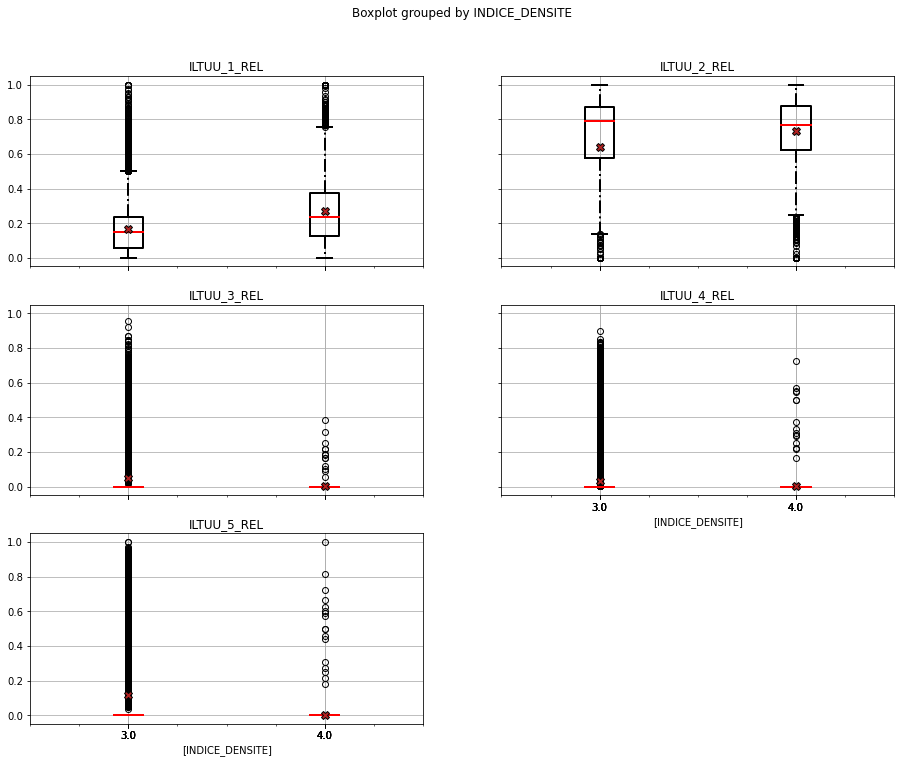

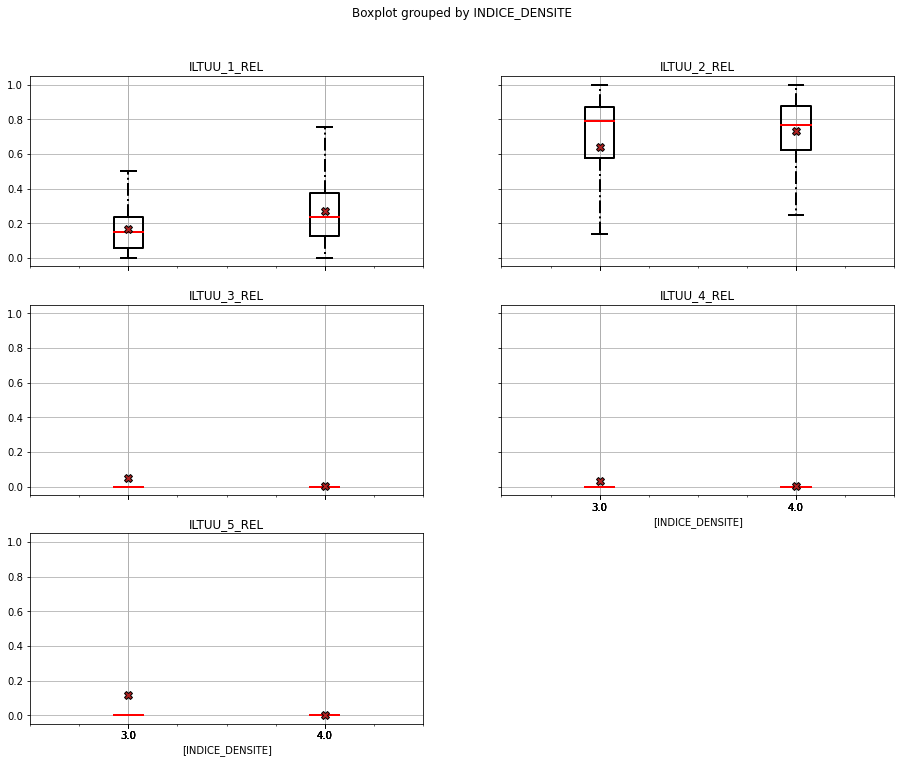

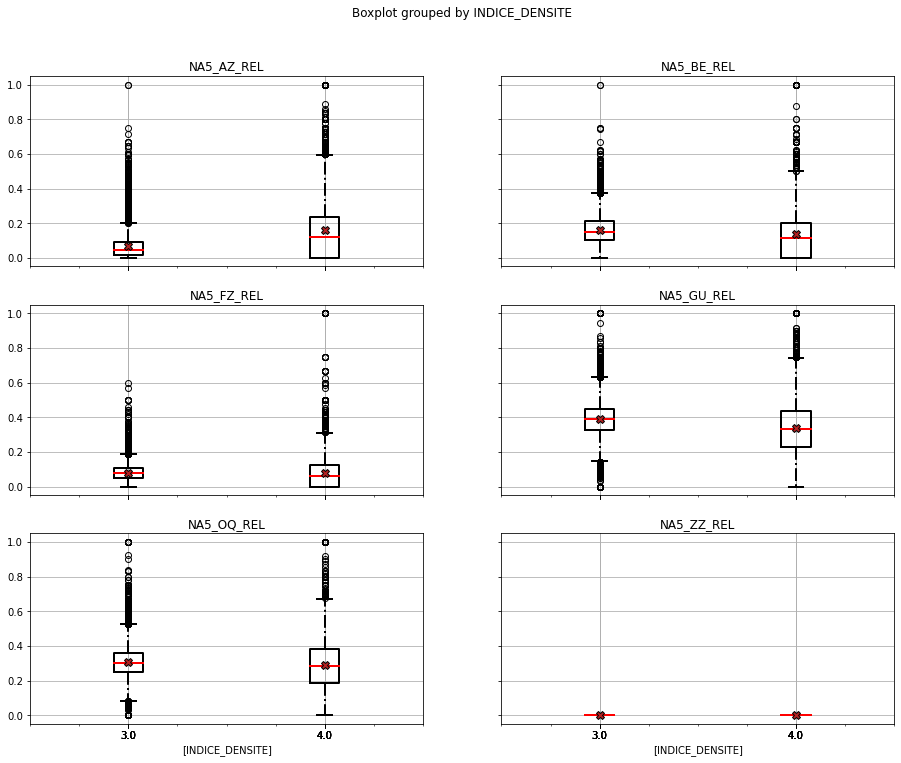

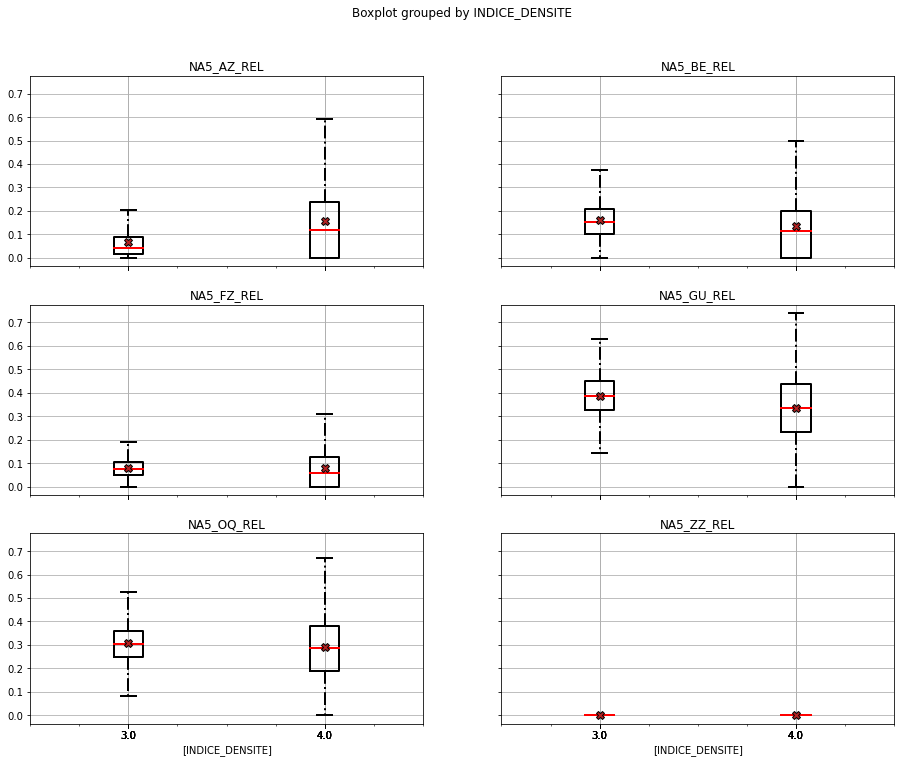

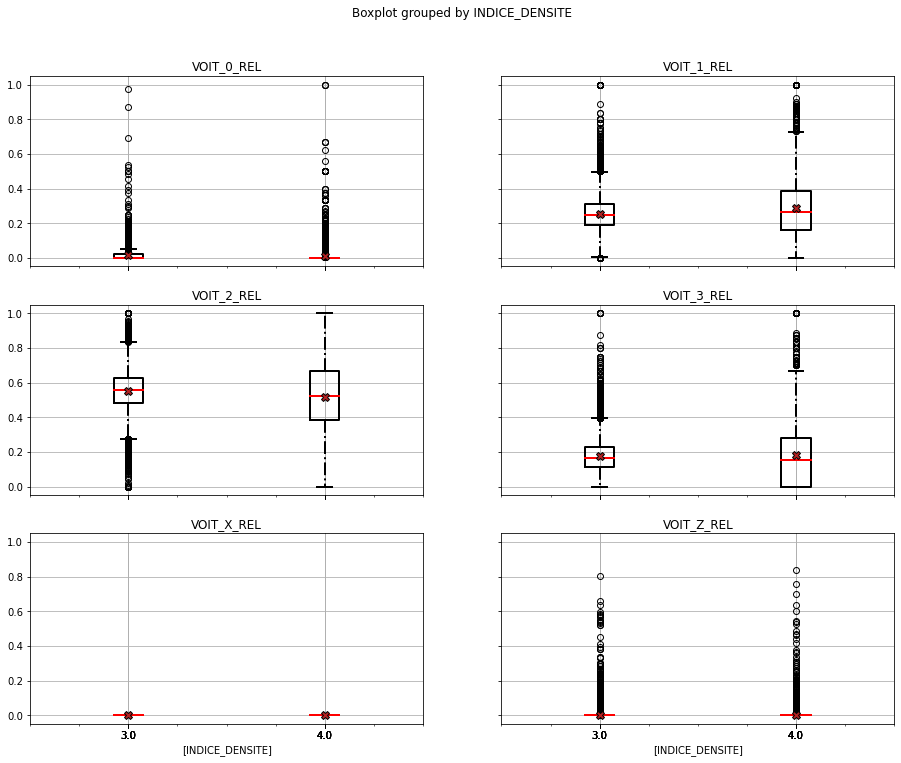

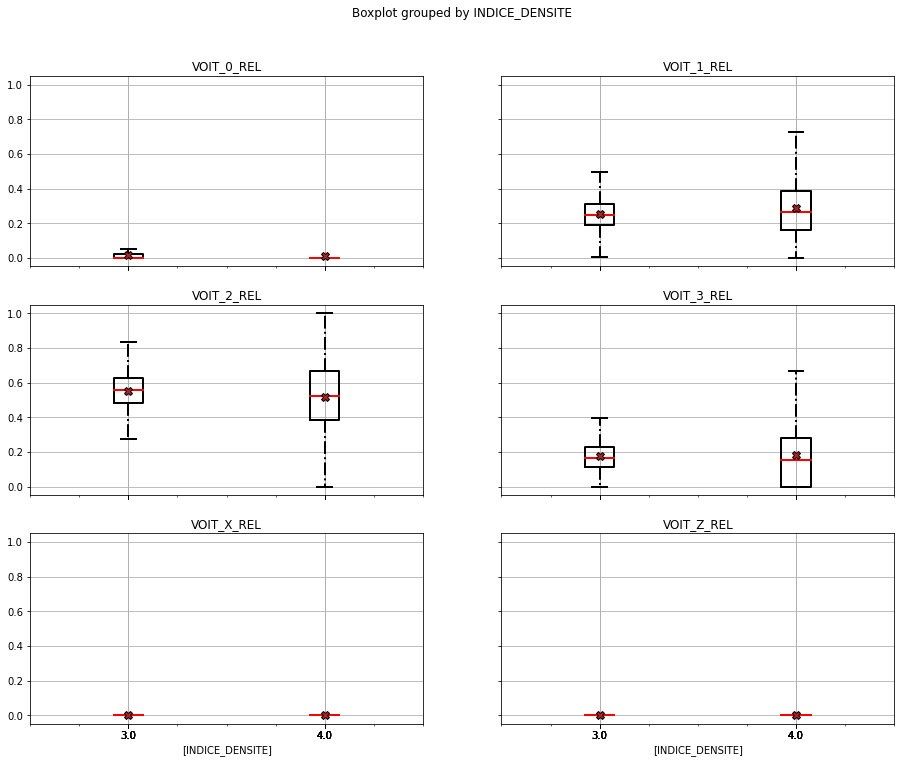

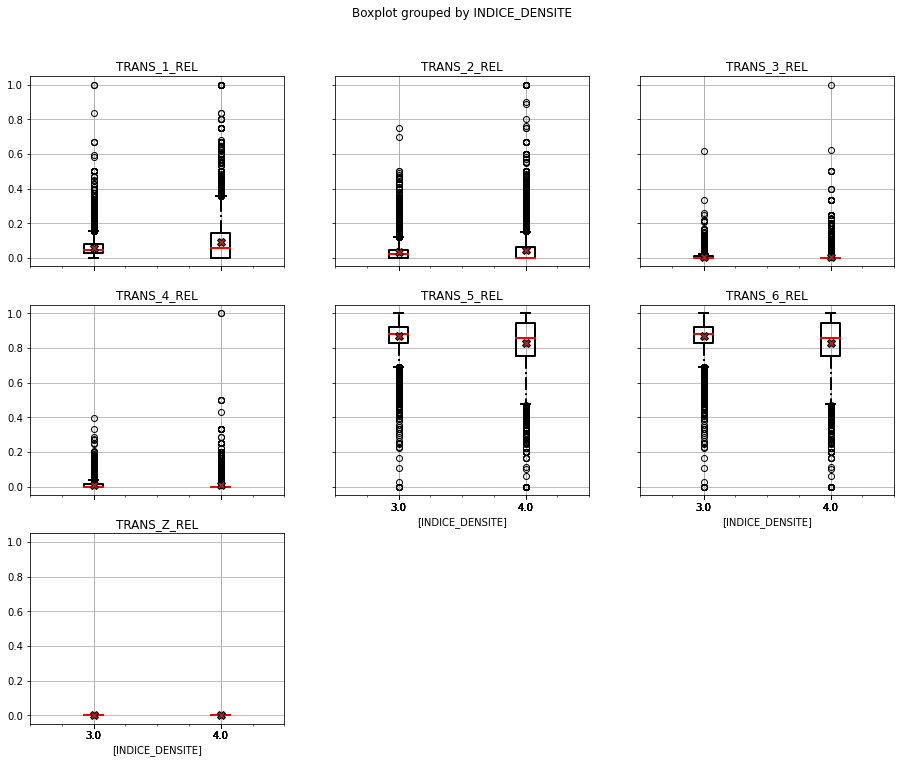

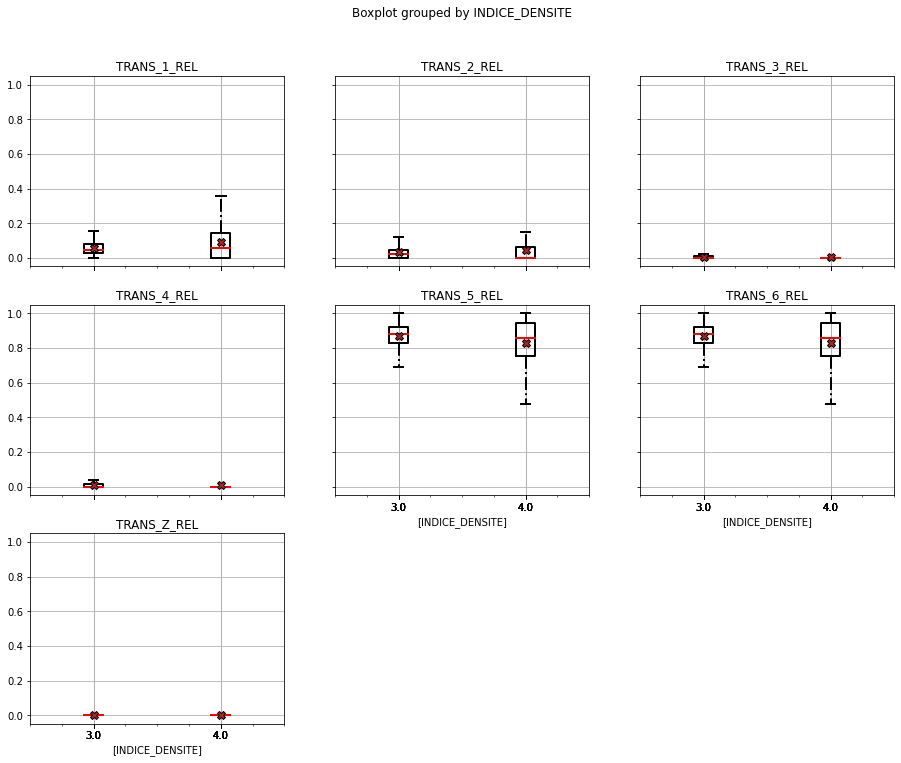

In [288]:
boxplots_gen_2("IILTUU", iltuu_cols, showfliers=True)
boxplots_gen_2("IILTUU", iltuu_cols, showfliers=False)
boxplots_gen_2("NA5", na5_cols, showfliers=True)
boxplots_gen_2("NA5", na5_cols, showfliers=False)
boxplots_gen_2("VOIT", voit_cols, showfliers=True)
boxplots_gen_2("VOIT", voit_cols, showfliers=False)
boxplots_gen_2("TRANS", trans_cols, showfliers=True)
boxplots_gen_2("TRANS", trans_cols, showfliers=False)